<a href="https://colab.research.google.com/github/HimanshuGitCode/Fitty-DataScience-Assement/blob/main/Proccesing_FittLyf_Data_Science_Intern_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Import and Exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load the data
file_path = 'AssignmentData.xlsx'
funnel = pd.read_excel(file_path, sheet_name='WorkerFunnel')

# Display the first few rows of the dataset
funnel.head()


,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


### Data Cleaning

In [9]:
import pandas as pd
import numpy as np


In [10]:
# Load the data
file_path = 'AssignmentData.xlsx'
funnel = pd.read_excel(file_path, sheet_name='WorkerFunnel')


In [11]:
# Display the first few rows of the dataset
print("Initial Data:")
print(funnel.head())

Initial Data:
                  Date Quarter Department Targeted Productivity Overtime  \
0  2015-01-01 00:00:00      Q1     Sewing                   0.8     7080   
1  2015-01-01 00:00:00      Q1  Finishing                  0.75      960   
2  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
3  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
4  2015-01-01 00:00:00      Q1     Sewing                   0.8     1920   

  No. of Workers Actual Productivity  
0             59            0.940725  
1              8              0.8865  
2           30.5             0.80057  
3           30.5             0.80057  
4             56                 NaN  


In [12]:
# Check for missing values
print("\nMissing Values before Cleaning:")
print(funnel.isnull().sum())


Missing Values before Cleaning:
Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64


In [13]:
# Remove duplicates
funnel.drop_duplicates(inplace=True)

In [14]:
# Identify numeric columns
numeric_columns = funnel.select_dtypes(include=[np.number]).columns

In [15]:
# Fill missing values in numeric columns with the median
funnel[numeric_columns] = funnel[numeric_columns].fillna(funnel[numeric_columns].median())

In [17]:
# For non-numeric columns, fill missing values with a placeholder (e.g., 'Unknown') if necessary
non_numeric_columns = funnel.select_dtypes(exclude=[np.number, 'datetime']).columns

for col in non_numeric_columns:
    funnel[col].fillna('Unknown', inplace=True)

In [18]:
# Check for missing values after cleaning
print("\nMissing Values after Cleaning:")
print(funnel.isnull().sum())


Missing Values after Cleaning:
Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64


In [19]:
# Display the cleaned data
print("\nCleaned Data:")
print(funnel.head())


Cleaned Data:
                  Date Quarter Department Targeted Productivity Overtime  \
0  2015-01-01 00:00:00      Q1     Sewing                   0.8     7080   
1  2015-01-01 00:00:00      Q1  Finishing                  0.75      960   
2  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
4  2015-01-01 00:00:00      Q1     Sewing                   0.8     1920   
5  2015-01-01 00:00:00      Q1     Sewing                   0.8     6720   

  No. of Workers Actual Productivity  
0             59            0.940725  
1              8              0.8865  
2           30.5             0.80057  
4             56             Unknown  
5             56            0.800125  


 Exploratory Data Analysis (EDA)

In [20]:
# Summary statistics
summary_stats = funnel.describe()

In [22]:
# Ensure 'Actual Productivity' is numeric
funnel['Actual Productivity'] = pd.to_numeric(funnel['Actual Productivity'], errors='coerce')

In [23]:
# Fill any NaN values in 'Actual Productivity' with the median
funnel['Actual Productivity'].fillna(funnel['Actual Productivity'].median(), inplace=True)

In [24]:
# Check for any remaining missing values
print("Missing Values after Cleaning:")
print(funnel.isnull().sum())

Missing Values after Cleaning:
Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64


In [25]:
# Summary statistics for 'Actual Productivity'
summary_stats = funnel['Actual Productivity'].describe()
print("\nSummary Statistics for 'Actual Productivity':")
print(summary_stats)


Summary Statistics for 'Actual Productivity':
count    1162.000000
mean        0.733664
std         0.173081
min         0.233705
25%         0.650410
50%         0.758540
75%         0.850137
max         1.120437
Name: Actual Productivity, dtype: float64


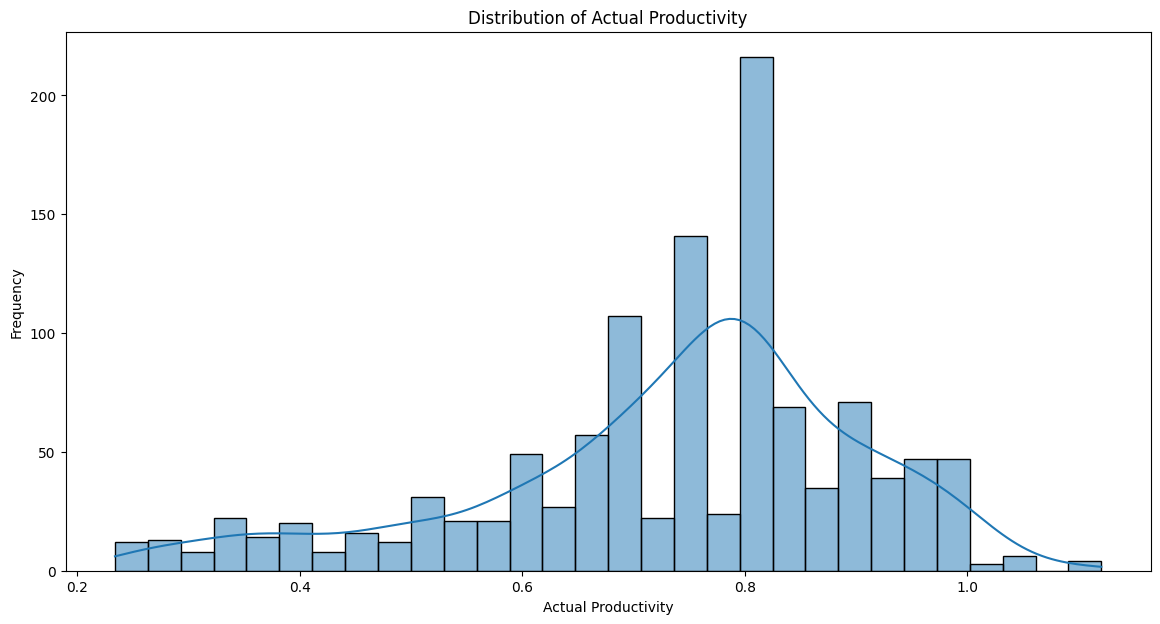

In [26]:
# Plotting distribution of 'Actual Productivity'
plt.figure(figsize=(14, 7))
sns.histplot(funnel['Actual Productivity'], kde=True, bins=30)
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

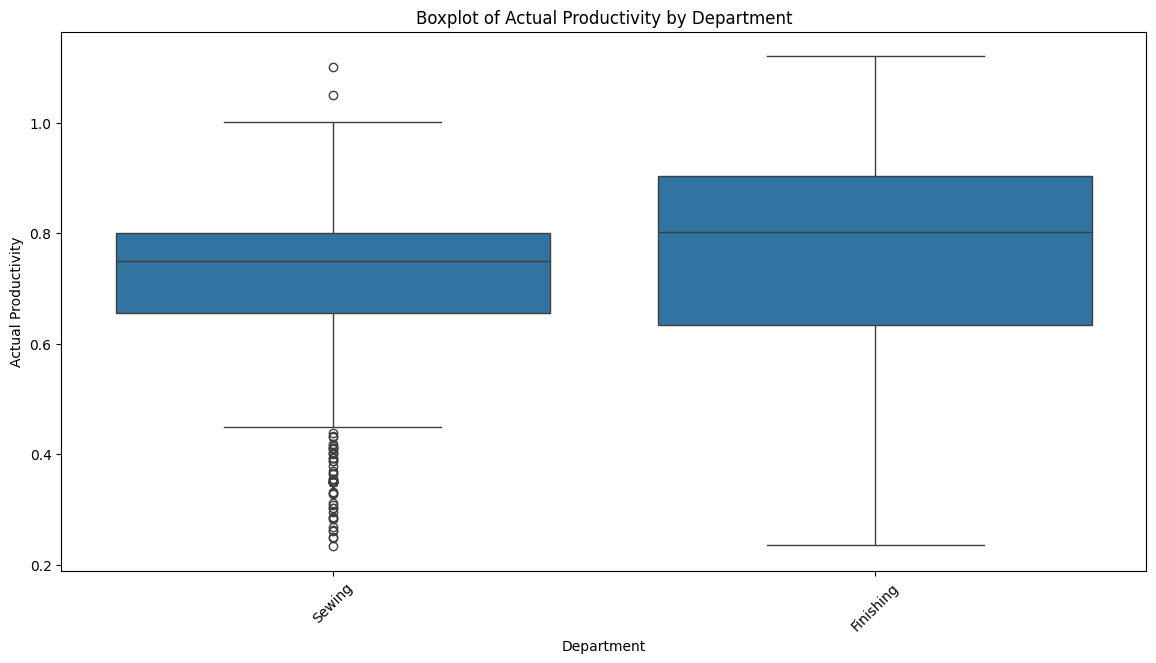

In [27]:
# Boxplot of 'Actual Productivity' by 'Department'
plt.figure(figsize=(14, 7))
sns.boxplot(x='Department', y='Actual Productivity', data=funnel)
plt.title('Boxplot of Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Convert 'Overtime' to numeric, coercing errors to NaN
funnel['Overtime'] = pd.to_numeric(funnel['Overtime'], errors='coerce')

In [31]:

# Fill NaN values in 'Overtime' with the median value
funnel['Overtime'].fillna(funnel['Overtime'].median(), inplace=True)

In [32]:
# Check the data to ensure conversion was successful
print(funnel['Overtime'].dtype)
print(funnel['Overtime'].isnull().sum())

float64
0


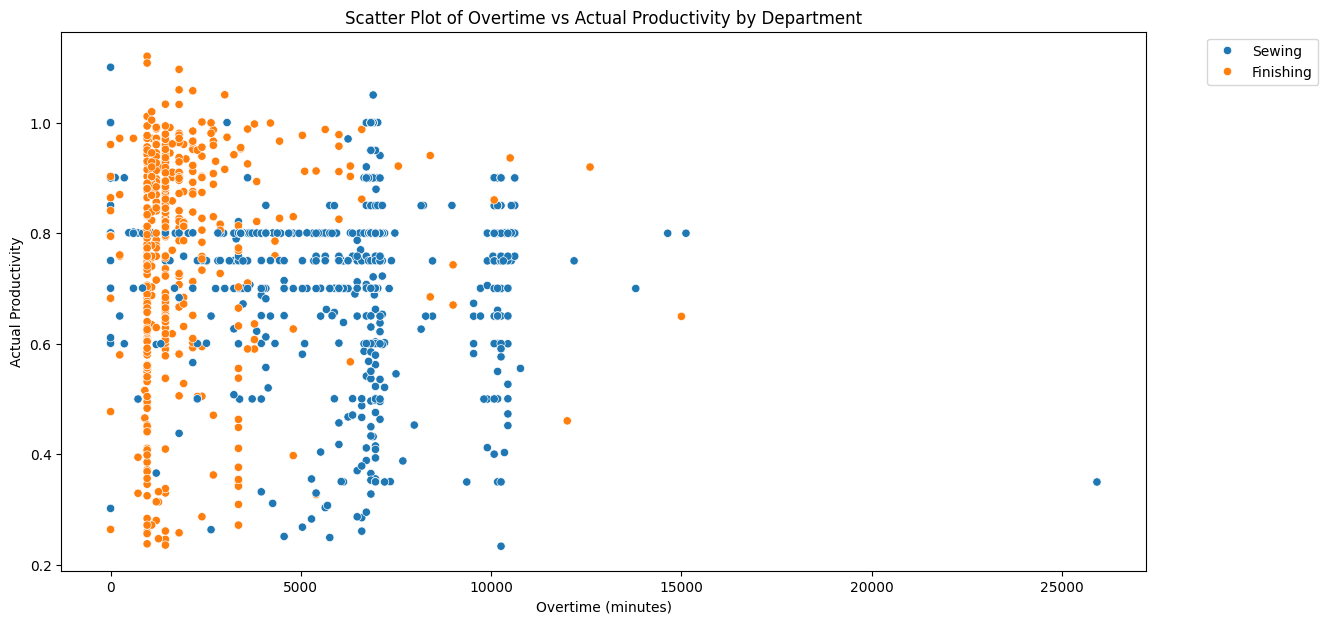

In [33]:
# Scatter plot of 'Overtime' vs 'Actual Productivity'
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Overtime', y='Actual Productivity', hue='Department', data=funnel)
plt.title('Scatter Plot of Overtime vs Actual Productivity by Department')
plt.xlabel('Overtime (minutes)')
plt.ylabel('Actual Productivity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 Explnation :-

  :- Convert to Numeric: The pd.to_numeric()
function is used with errors='coerce' to convert all entries in the Overtime column to numeric values. Any non-numeric values are turned into NaN.

:- Fill NaN Values: Any NaN values that result from the conversion are filled with the median of the Overtime column. This is a simple and common approach to handle missing numeric data.

:- Re-run the Plot: After ensuring that the Overtime column contains only numeric values, the scatter plot should now work without any issues.

In [35]:
# Select only numeric columns for correlation matrix
numeric_columns = funnel.select_dtypes(include=[np.number]).columns
correlation_matrix = funnel[numeric_columns].corr()


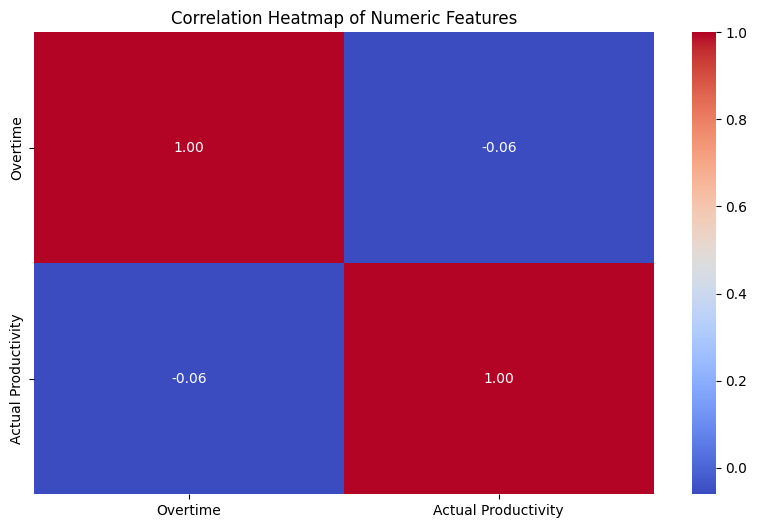

In [36]:
# Display the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Explnation:-

:- Select Numeric Columns: The select_dtypes(include=[np.number]) function filters the DataFrame to include only numeric columns, excluding non-numeric columns like datetime.

:- Calculate Correlation: The correlation matrix is then computed using the filtered numeric columns.

:- Plot the Heatmap: The heatmap is generated using sns.heatmap(), which now only considers numeric features, so it should work without any errors.

# Principal Component Analysis (PCA)

In [38]:
# Define the features for PCA
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']

In [39]:
# Convert all feature columns to numeric, coercing errors to NaN
funnel[features] = funnel[features].apply(pd.to_numeric, errors='coerce')

In [40]:
# Fill NaN values with the median of each column
funnel[features] = funnel[features].fillna(funnel[features].median())

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
# Standardize the data
x = funnel[features]
x = StandardScaler().fit_transform(x)

In [43]:
# PCA
pca = PCA()
pca_components = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_

In [44]:
# Determine the number of components explaining at least 90% of the variance
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.90) + 1

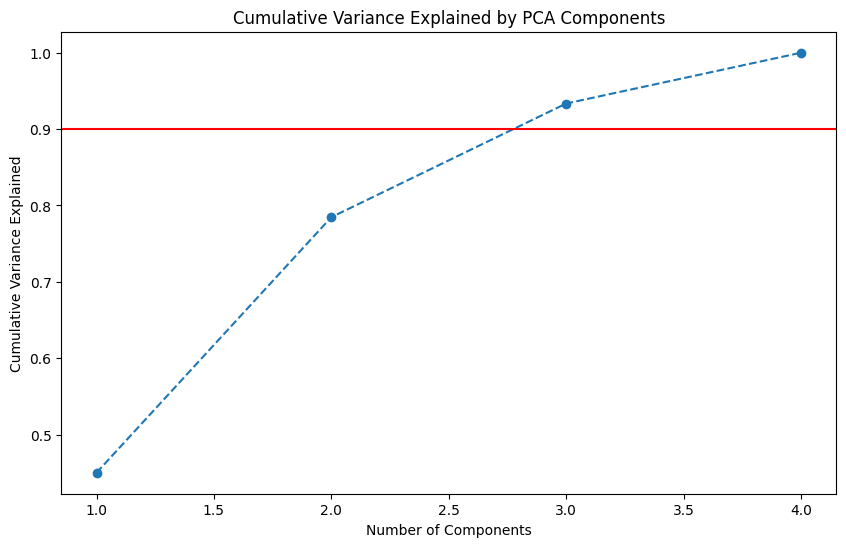

In [45]:
# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [46]:
# Output the number of components
print(f"Number of principal components that explain at least 90% of the variance: {n_components}")

Number of principal components that explain at least 90% of the variance: 3


Explnation:-

:- Convert to Numeric: All the columns required for PCA are converted to numeric types using pd.to_numeric(). Any non-numeric values are coerced to NaN.

:- Handle NaN Values: Any resulting NaN values from the conversion are filled with the median value of the respective column to maintain the integrity of the data.

:- Standardize the Data: The data is standardized using StandardScaler, which is a necessary step before performing PCA to ensure that each feature contributes equally to the analysis.

:- PCA Analysis: The PCA is performed, and the cumulative variance explained by each principal component is plotted. The number of components needed to explain at least 90% of the variance is identified and printed.

# Predictive Modeling with ARIMA

In [47]:
# Convert Date to datetime format
funnel['Date'] = pd.to_datetime(funnel['Date'])

In [48]:
# Set Date as the index
funnel.set_index('Date', inplace=True)


In [49]:
# ARIMA modeling
model = ARIMA(funnel['Actual Productivity'], order=(5, 1, 0))
arima_model = model.fit()

In [50]:
# Forecast for the next 4 weeks
forecast = arima_model.forecast(steps=4)

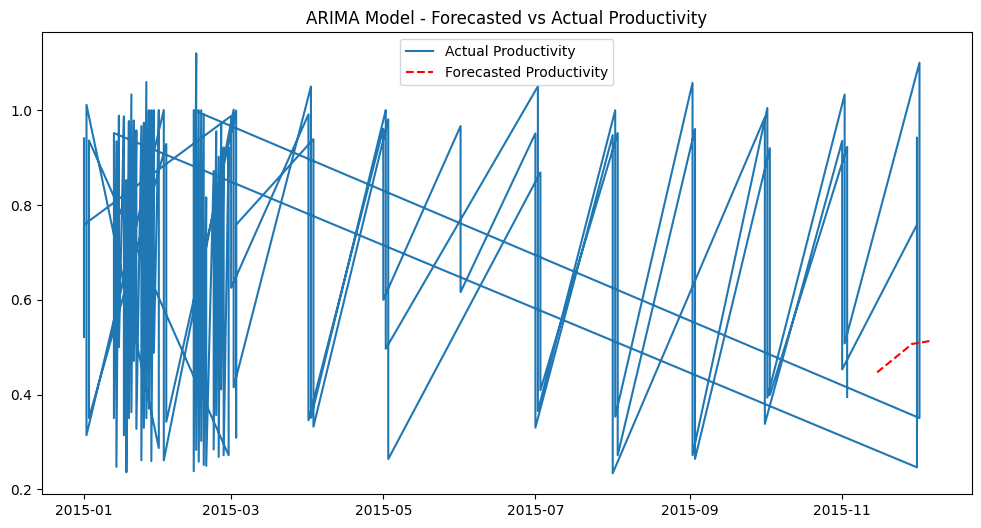

In [51]:
# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(funnel.index, funnel['Actual Productivity'], label='Actual Productivity')
plt.plot(pd.date_range(start=funnel.index[-1], periods=5, freq='W')[1:], forecast, label='Forecasted Productivity', linestyle='--', color='red')
plt.title('ARIMA Model - Forecasted vs Actual Productivity')
plt.legend()
plt.show()

# Clustering Analysis

In [52]:
# K-Means clustering
kmeans = KMeans(n_clusters=3)
funnel['Cluster'] = kmeans.fit_predict(x)

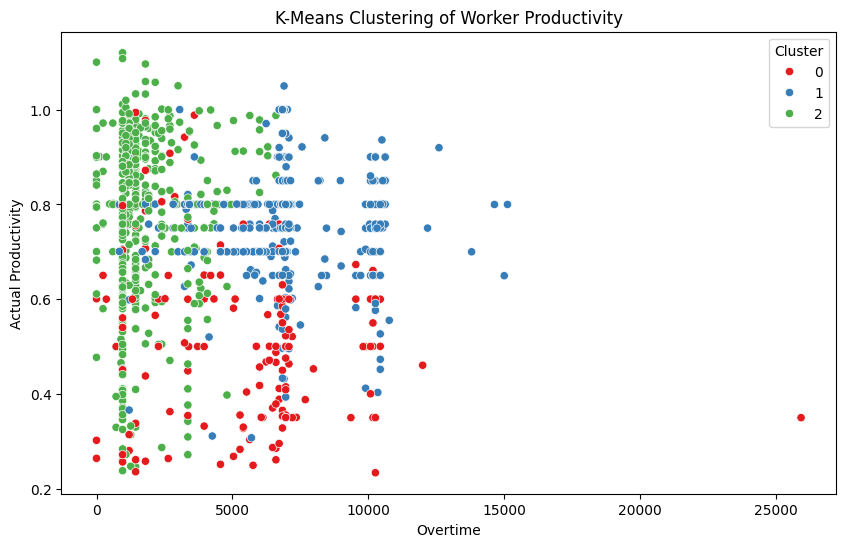

In [53]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=funnel['Overtime'], y=funnel['Actual Productivity'], hue=funnel['Cluster'], palette='Set1')
plt.title('K-Means Clustering of Worker Productivity')
plt.show()

# Anomaly Detection with Isolation Forest

In [54]:
from sklearn.ensemble import IsolationForest

In [55]:
# Load the credit card dataset
transactions = pd.read_excel(file_path, sheet_name='creditcard')

In [56]:
# Feature scaling
scaler = StandardScaler()
transactions[['Time', 'Amount']] = scaler.fit_transform(transactions[['Time', 'Amount']])

In [58]:
# Drop the 'Class' column temporarily to clean the other columns
features = transactions.drop(columns=['Class'])

In [59]:
# Convert all columns to numeric, coercing errors to NaN
features = features.apply(pd.to_numeric, errors='coerce')

In [60]:
# Now add the 'Class' column back
transactions_cleaned = pd.concat([features, transactions['Class']], axis=1)

Applying the Isolation Forest Model


In [61]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.001)

In [63]:
# check and fill any remaining NaN values in the entire dataset
transactions_cleaned = transactions_cleaned.fillna(transactions_cleaned.median())


In [64]:
# Verify that there are no remaining NaN values
print(transactions_cleaned.isnull().sum().sum())  # This should return 0 if there are no NaN values left

0


In [65]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.001, random_state=42)

In [66]:
# Fit the model and predict anomalies
transactions_cleaned['Anomaly'] = isolation_forest.fit_predict(transactions_cleaned.drop(columns=['Class']))

In [67]:
# Output the results
print(transactions_cleaned['Anomaly'].value_counts())

Anomaly
 1    284522
-1       285
Name: count, dtype: int64
